# Сборный Проект - 1

Четвертый учебный проект.

## Задача

Четвертый учебный проект выполнен от лица интернет магазина, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#Настраиваем отображение данных типа float
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
#Сохраненем данные из файла в датасет 'data'
data = pd.read_csv('/datasets/games.csv')

## Предобработка данных

In [3]:
#Взглянем на таблицу
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


Видно, что в названиях столбцов встречается верхний регистр.  
Приведем все названия к нижнему регистру.  

In [4]:
#Приводим все названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

#Проверим результат
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


**Описание данных**

* name — название игры
* platform — платформа
* year_of_release — год выпуска
* genre — жанр игры
* na_sales — продажи в Северной Америке (миллионы проданных копий)
* eu_sales — продажи в Европе (миллионы проданных копий)
* jp_sales — продажи в Японии (миллионы проданных копий)
* other_sales — продажи в других странах (миллионы проданных копий)
* critic_score — оценка критиков (максимум 100)
* user_Score — оценка пользователей (максимум 10)
* rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Видно, что в столбце 'year_of_release' тип данных - float, хотя правильно установить тип данных int, проверим и остальные столбцы.

In [5]:
#Проверим результат
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [6]:
#Проверим какие значения используются в столбце 'critic_score'
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видно, что используются только целые значения, но в будущем, нам понадобится производить над значениями данного столбца математические операции, поэтому оставим тип данных данного столбца - float

In [7]:
#Проверим какие значения используются в столбце 'user_score'
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видно, что в данном столбце используются тольцо float значения, за исключением значения 'tbd'.  
Аббревиатура 'tbd' означает To Be Determined (будет определено). Это значит, что для нас данное значение равносильно пропуску.  
Заменим эти значения на значение Nan.

In [8]:
#Заменяем значения 'tbd' на NaN. 
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

В итоге, необходимо изменить тип данных в следующих столбцах: 
 - year_of_release в Int
 - user_score в float

In [9]:
#Приводим указанные столбцы к нужному типу данных
data = data.astype({
    "year_of_release":'Int64',
    "user_score":'float64'
})

Отлично, теперь типы данных верные для всех столбцов.  

Рассмотрим пропуски, встречающиеся в датасете.

In [10]:
#Смотрим, в каких столбцах присутствуют пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
#Рассмотрим пропуски в столбце'name'
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,nan,nan,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,nan,nan,NaN


Здесь всего 2 пропуска, способа достоверно восстановить данные нет, из-за малого количества строк с пропусками в столбце 'name', их можно удалить.

In [12]:
#Удаляем пропуски в столбце'name'
data = data.dropna(subset=['name']).reset_index(drop=True)

Остальные пропуски оставим без изменения, они не помешают нам в дальнейшем анализе.  
Не будем их удалять, чтобы не потерять остальную информацию из строк с пропусками.

In [13]:
#Проверим остались ли пропуски
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Создадим новый столбец, в котором посчитаем суммарные продаже во всех регионах.

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,nan,NaN,0.01


### Вывод

В ходе предобрабтки данных были выполнены следующие действия:  
- Все названия столбцов приведены к нижнему регистру
- Изменены типы данных в следующих столбцах: 
 - year_of_release в Int
 - critic_score в Int
 - user_score в float
- Значения tbd заменены на NaN и обработаны вместе с пропусками
- Пропуски в столбцах оставлены без изменений: 
 - user_score
 - rating
 - year_of_release
 - critic_score
- Создан новый столбец, в котором подсчитаны суммарные продажи во всех регионах - 'total_sales'

Пропуски могли быть вызваны тем, что данные собирались из разных открытых источников, в которых могло быть указано разное количество параметров.

## Исследовательский анализ данных

### Определение актуального периода

**Посмотрим, сколько игр выпускалось в разные годы.**

In [15]:
#Создаем новую таблицу и сохраняем там сгруппированные по году игры.
games_per_year = data.groupby('year_of_release')['name'].count().reset_index()

#Переименуем столбцы
games_per_year.columns = ['year_of_release','released_games_amount']

games_per_year.head()

,year_of_release,released_games_amount
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


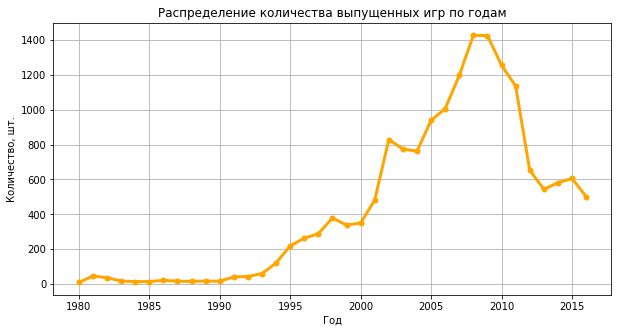

In [16]:
#Построим график
plt.figure(figsize=(10, 5))    
plt.plot(
    games_per_year.year_of_release,
    games_per_year.released_games_amount,
    color='orange',
    marker='o',
    linewidth=3,
    markersize=5
);
plt.ylabel('Количество, шт.')
plt.xlabel('Год')
plt.title('Распределение количества выпущенных игр по годам')
plt.grid()

Активный рост количества выпускаемых игр начался в 2000 году.  
Он достиг пика в 1400 игр в год в 2008 году, но в 2009 году количество игр стало резко уменьшаться.  
В 2012 году активный спад количества игр прекратилось, количестввыпускаемых игр относительно стабилизировалось на уровне 500-600 игр в год.   
Полагаю, что резкий спад количества игр, созданных на указанных в датафрейме платформах, связан с тем, что количество созданных игр начало переходить в их качество, также появился рынок мобильных игр, который не представлен в имеющихся данных.
 
**Полагаю, что наиболее резепрентативными для прогноза на 2017 год будут являться срез данных, начиная с 2012 года.**

**Посмотрим, как менялись продажи по платформам, в зависимости от года.**

Выберем первые 10 платформ по суммарным продажам за все время.

In [17]:
#Создаем новую таблицу и сохраняем там сгруппированный доход по платформам.
platform_sales = data.groupby(['platform'])['total_sales'].sum().sort_values(ascending = False).reset_index()

#Проверим созданную таблцу
platform_sales.head(10)

,platform,total_sales
0,PS2,"1,255.77"
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [18]:
#Отбросим платформы, которые не попали в первую десятку
top_10_platforms_sales = platform_sales.head(10)

Построим распределение объема продаж по годам для выбранных платформ.

In [19]:
#Получим список названий платформ, которые вошли в первую десятку
top_10_names = top_10_platforms_sales['platform']

#Cоздадим новый столбец в таблице data, который показывает находится ли платформа в первой десятке по объему продаж за все время
data['in_top_10'] = data['platform'].isin(top_10_names)

#Проверим добавление нового столбца
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,in_top_10
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54,True
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,NaN,40.24,False
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52,True
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77,True
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,NaN,31.38,False


In [20]:
#Cоздадим новую таблицу, в которой сгруппируем доход лучших 10 платформ в зависимости от года и платформы
top_10_sales_per_year = data.query('in_top_10 == True').groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Проверим созданную таблицу
top_10_sales_per_year

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
112,X360,2012,99.74
113,X360,2013,88.58
114,X360,2014,34.74
115,X360,2015,11.96


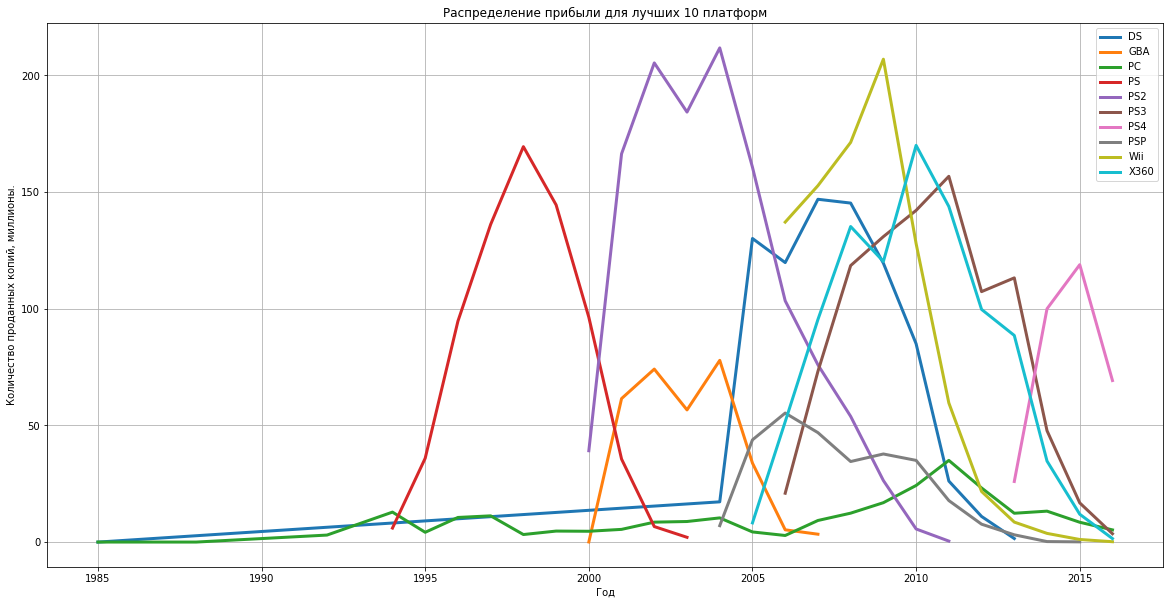

In [21]:
#Cоберем список из уникальных значений из стобца 'platform'
platform_names = top_10_sales_per_year.platform.unique()

#Построим график
plt.figure(figsize=(20, 10)) 
for name in platform_names:
    plt.plot(
    top_10_sales_per_year.query('platform == @name').year_of_release,
    top_10_sales_per_year.query('platform == @name').total_sales,
    label=name,
    linewidth=3,
    markersize=8,
    )
plt.ylabel('Количество проданных копий, миллионы.')
plt.xlabel('Год')
plt.title('Распределение прибыли для лучших 10 платформ')
plt.grid()   
plt.legend()

Видно, что у платформ есть "срок жизни", в течении которого на них выпускаются игры.  
Например платформы PS, PS2, Wii, PSP, DS, GBA уже потеряли свою актуальность и игры на них уже не выпускаются.

Распределение количества продаж для каждой из платформ - нормальное.

Определим срок жизни платформ, попавших в 10 лучших. 


In [22]:
#Группируем в цикле информацию по каждой платформе и рассчитываем срок жизни для каждой платформы.
for name in platform_names:
    print('Имя платформы:', name,
        '\nСрок жизни платформы', (
            top_10_sales_per_year.query('platform == @name')['year_of_release'].max() 
            - top_10_sales_per_year.query('platform == @name')['year_of_release'].min()),
          '\n'
         )
            

Имя платформы: DS 
Срок жизни платформы 28 

Имя платформы: GBA 
Срок жизни платформы 7 

Имя платформы: PC 
Срок жизни платформы 31 

Имя платформы: PS 
Срок жизни платформы 9 

Имя платформы: PS2 
Срок жизни платформы 11 

Имя платформы: PS3 
Срок жизни платформы 10 

Имя платформы: PS4 
Срок жизни платформы 3 

Имя платформы: PSP 
Срок жизни платформы 11 

Имя платформы: Wii 
Срок жизни платформы 10 

Имя платформы: X360 
Срок жизни платформы 11 



Срок жизни платформ, утративших актуальность:  
- PS - 9 лет
- PS2 - 11 лет
- PSP - 11 лет
- Wii - 10 лет
- DS - не 28, а 9 лет  
По графику видно, что для платформы DS есть ошибочное значение продаж в 1985 году, из-за чего срок жизни завышен.
Данная консоль Nintendo DS была выпущена в 2004 году, что подтверждается информацией с графика)
Данное ошибочное значение не повлияет на будущее исследование, так как для поставленных вопросов информация о продажах за 1985 год - не актуальна.
- GBA - 7 лет

Срок жизни платформ индивидуален для каждой из них и зависит от большого количества факторов.
Среди исследованных платформ, их срок жизни попдает в в период от 7 - 11 лет.

Отдельно хочу отметить срок жизни такой платформы как PC - 31 год.  
Это обосновано тем, что характеристики персональных компьютеров постоянно развиваются вместе с техническим прогрессом и не привязаны к выходу новых "Версий", как например платформа Play Station (PS, PS2, PS3).

#### Вывод

**Полагаю, что наиболее резепрентативными для прогноза на 2017 год будут являться срез данных, начиная с 2012 года включительно.**  
В 2012 году активный спад количества игр прекратился, начиная с 2012 года количество выпускаемых игр стабилизировалось.   
Таким образом, мы будем рассматривать данные за 5 лет.   
Срок жизни платформы лежит в прериоде от 7 - 11 лет, при условии нормального распределения значений продаж в период жизни платформы, которое мы наблюдаем, срок в 5 лет позволит нам оценить актуальность попавших в данный срез платформ, заметить тенденцию к росту или падению.  


### Изучение платформ по данным актуального периода (с 2012 года)

Создадим новую таблицу, где соберем данные за актуальный период (с 2012 года) по всем платформам.


In [23]:
#Cоздадим таблицу
actual_data = data.loc[data['year_of_release'] >= 2012].reset_index(drop = True)

#Выведем первые 5 строк таблицы
actual_data.head(5)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,in_top_10
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05,True
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27,True
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,nan,nan,NaN,14.63,True
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,NaN,14.60,False
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79,True


**Определим, какие платформы растут, а каки падают.**    

In [24]:
#Cоздадим новую таблицу, в которой сгруппируем доход всех платформ в зависимости от года и платформ для актуального периода
acltual_sales = actual_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Проверим созданную таблицу
acltual_sales

,platform,year_of_release,total_sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14
5,DS,2012,11.01
6,DS,2013,1.54
7,PC,2012,23.22
8,PC,2013,12.38
9,PC,2014,13.28


На основе таблицы acltual_sales построим график дляопределения тенденций платформы к росту или падению.

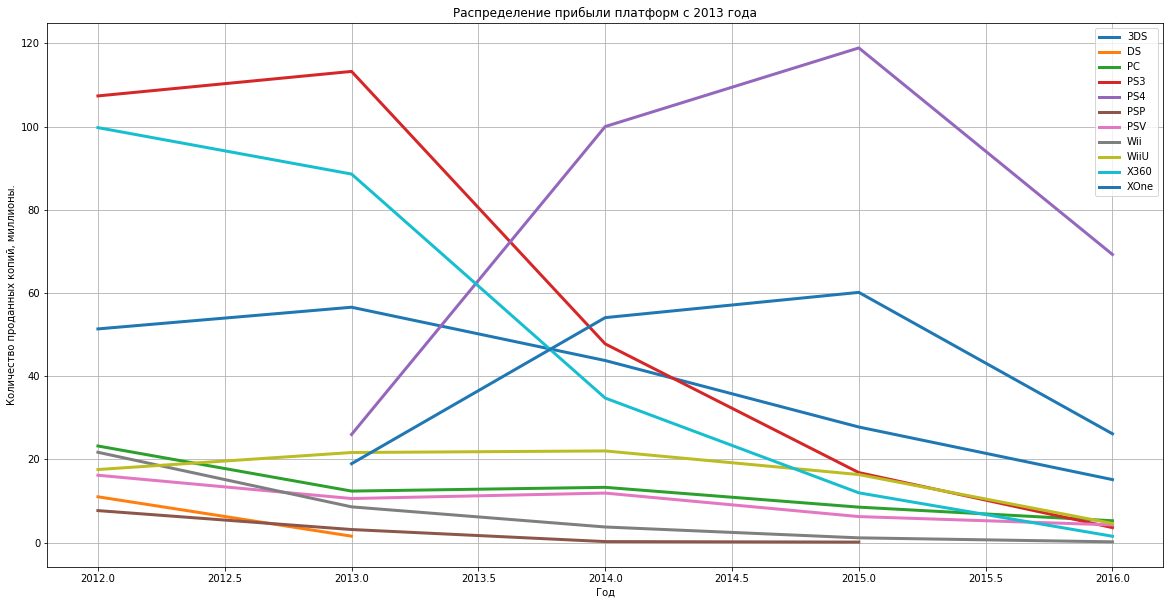

In [25]:
#Cоберем список из уникальных значений из стобца 'platform'
platform_names = acltual_sales.platform.unique()

#Построим график
plt.figure(figsize=(20, 10)) 
for name in platform_names:
    plt.plot(
    acltual_sales.query('platform == @name').year_of_release,
    acltual_sales.query('platform == @name').total_sales,
    label=name,
    linewidth=3,
    markersize=8,
    )
plt.ylabel('Количество проданных копий, миллионы.')
plt.xlabel('Год')
plt.title('Распределение прибыли платформ с 2013 года')
plt.grid()   
plt.legend()

Видно, что 2 платформы полностью устарили к 2016 году, а именно: **PSP** и **DS**.   

На графике виден спад продаж по всем платформам за 2016 год, полагаю это связано с тем, что данные за 2016 - неполные, они собраны в декабре 2016, скорее всего в датасет не попали данные о продажах за последний отчетный квартал и показатели для 2016 года повысятся для всех платоформ.   

С учетом неполных данных за 2016 год, видно, что новые платофрмы, такие как **PS4** и **XOne** набирают популярность.  
К устаревающим платформам можно отнести их предыдущие версии - **PS3** и **X360**. Также к платформам, теряющим свою популярность отнесем **3DS**, **Wii**, **PSV** и **WiiU**.

Отдельно отмечу платформу **PC** она не может устареть окончательно, это связано с тем, что характеристики персональных компьютеров постоянно развиваются вместе с техническим прогрессом и не привязаны к выходу новых "Версий", как например платформа Play Station (PS, PS2, PS3).

**Определим, какие из платформ лидируют по продажам на 2016 год.**

In [26]:
top_2016_sales = acltual_sales.query('year_of_release == 2016').sort_values('total_sales', ascending = False).reset_index(drop = True)
top_2016_sales

,platform,year_of_release,total_sales
0,PS4,2016,69.25
1,XOne,2016,26.15
2,3DS,2016,15.14
3,PC,2016,5.25
4,WiiU,2016,4.60
5,PSV,2016,4.25
6,PS3,2016,3.60
7,X360,2016,1.52
8,Wii,2016,0.18


#### Вывод

К потенциально прибыльным платформам отнесем **PS4** и **XOne**, они лидируют по объемам продаж, они также находятся в состоянии роста.  
Хоть платформа **3DS** и замыкает тройку лидеров по продажам, к потенциально прибыльным ее относить не стоит, так как пик ее популярности прошел в 2013 году, а продажи к 2015 году уже упали вдвое, относительно 2013 года.

### Изучение продаж игр на глобльном рынке, в зависимости от платформы

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам.

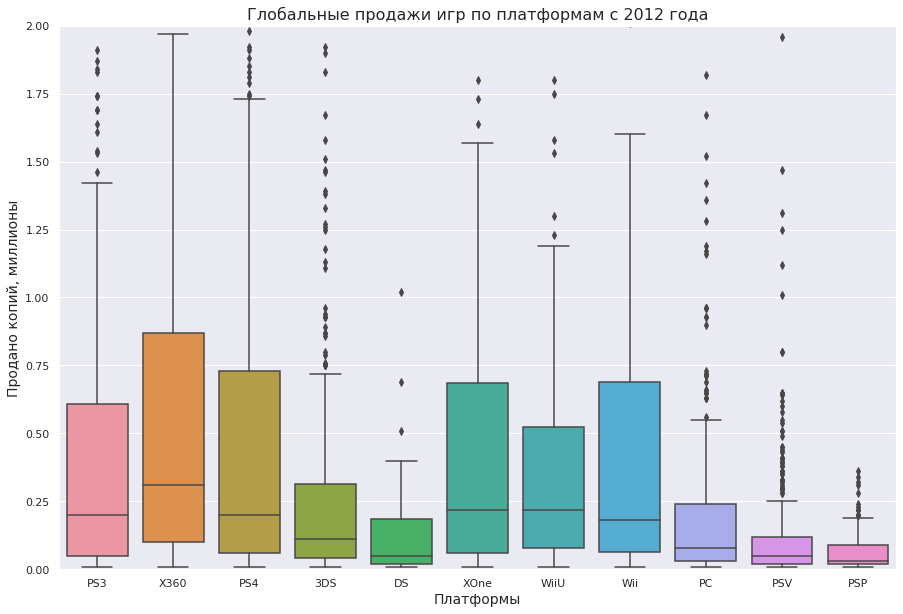

In [27]:
#Построим диаграммы размаха для всех платформ, за актуальный период
sns.set(rc={'figure.figsize':(15,10)})
boxplot = sns.boxplot(x='platform',
                y='total_sales',
                data=actual_data)

boxplot.axes.set_title("Глобальные продажи игр по платформам с 2012 года", fontsize=16)
boxplot.set_xlabel("Платформы", fontsize=14)
boxplot.set_ylabel("Продано копий, миллионы", fontsize=14)
boxplot.set_ylim(0,2);

#### Вывод

Благодаря диаграммам размаха можно выделить 6 платформ, для которых значения медианы, значения первых и третьих квартилей выгодно отличаются от оставшихся платформ.  
Это значит, что на этих платформах чаще выходили успешные, состоявшиеся в продажах игры:  
 - PS3
 - X360
 - PS4
 - XOne
 - WiiU
 - Wii

### Влияние отзывов пользователей и критиков на продажи, на примере платформы PS4

На примере платформы PS4 рассмотрим, как влияют на продажи отзывы пользователей и критиков.  

Построим диаграммы рассеяния.

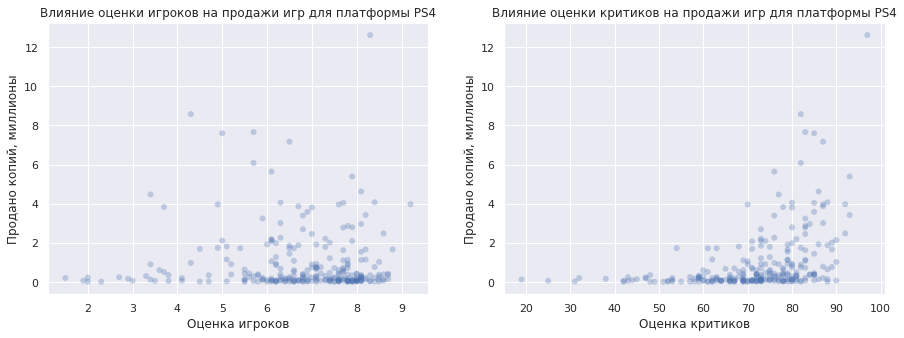

In [28]:
#Cтроим 2 диаграммы рассеяния для зависимостей оценок и продаж
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

sns.scatterplot(data=actual_data.query('platform == "PS4"'),
                      x="user_score",
                      y="total_sales",
                      edgecolor = 'none',
                      alpha = .3,
                      ax = ax1); 
ax1.set_title("Влияние оценки игроков на продажи игр для платформы PS4", fontsize=12)
ax1.set_xlabel("Оценка игроков", fontsize=12)
ax1.set_ylabel("Продано копий, миллионы", fontsize=12);

sns.scatterplot(data=actual_data.query('platform == "PS4"'),
                      x="critic_score",
                      y="total_sales",
                      edgecolor = 'none',
                      alpha = .3,
                      ax = ax2);

ax2.set_title("Влияние оценки критиков на продажи игр для платформы PS4", fontsize=12)
ax2.set_xlabel("Оценка критиков", fontsize=12)
ax2.set_ylabel("Продано копий, миллионы", fontsize=12);

Определим коэффициент Пирсона для отношения отзывов (пользователей и критиков) к продажам.

In [29]:
#Создадим функцию для определения степени влияния зависимости
def influence(correl):
    
    if abs(correl) < 0.2 and correl < 0:
        result = 'Очень слабая, обратная'        
    elif abs(correl) < 0.2 and correl > 0:
        result = 'Очень слабая, прямая'
        
    elif 0.2 <= abs(correl) < 0.5 and correl < 0:
        result = 'Cлабая, обратная'        
    elif 0.2 <= abs(correl) < 0.5 and correl > 0:
        result = 'Cлабая, прямая'
        
    elif 0.5 <= abs(correl) < 0.7 and correl < 0:
        result = 'Средняя, обратная'        
    elif 0.5 <= abs(correl) < 0.7 and correl > 0:
        result = 'Средняя, прямая'        

    elif 0.7 <= abs(correl) < 0.9 and correl < 0:
        result = 'Высокая, обратная'        
    elif 0.7 <= abs(correl) < 0.9 and correl > 0:
        result = 'Высокая, прямая'  
        
    elif abs(correl) >= 0.9 and correl < 0:
        result = 'Очень высокая, обратная'        
    elif abs(correl) >= 0.9 and correl > 0:
        result = 'Очень высокая, прямая'    
    
    return result



#Создадим функцию для определения пары коэффициентов Пирсона 
def get_correl(name):
    user_correl = actual_data.query('platform == @name')['total_sales'].corr(actual_data.query('platform == @name')['user_score'])
    critic_correl = actual_data.query('platform == @name')['total_sales'].corr(actual_data.query('platform == @name')['critic_score'])
    print('Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы', name, ': {:,.2f}'.format(user_correl), '-', influence(user_correl))
    print('Коэффициент Пирсона для отношения отзывов критиков к продажам платформы', name, ': {:,.2f}'.format(critic_correl), '-', influence(critic_correl))
    
#Воспользуемся функцией для платформы PS4
get_correl('PS4')   

Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы PS4 : -0.03 - Очень слабая, обратная
Коэффициент Пирсона для отношения отзывов критиков к продажам платформы PS4 : 0.41 - Cлабая, прямая


**Проверим влияние оценок критиков и пользователей на продажи на всех платформах, которые имели продажи в 2016 году.**

In [30]:
#Cоздадим список, в котором соберем имена необходимых платформ
#Воспользуемся уже созданной в пункте 3.2 таблице top_2016_sales 
platform_names = top_2016_sales.platform
platform_names

0     PS4
1    XOne
2     3DS
3      PC
4    WiiU
5     PSV
6     PS3
7    X360
8     Wii
Name: platform, dtype: object

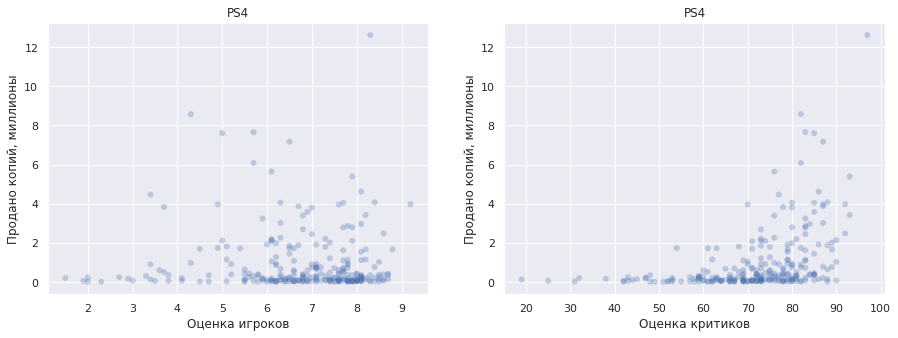

Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы PS4 : -0.03 - Очень слабая, обратная
Коэффициент Пирсона для отношения отзывов критиков к продажам платформы PS4 : 0.41 - Cлабая, прямая


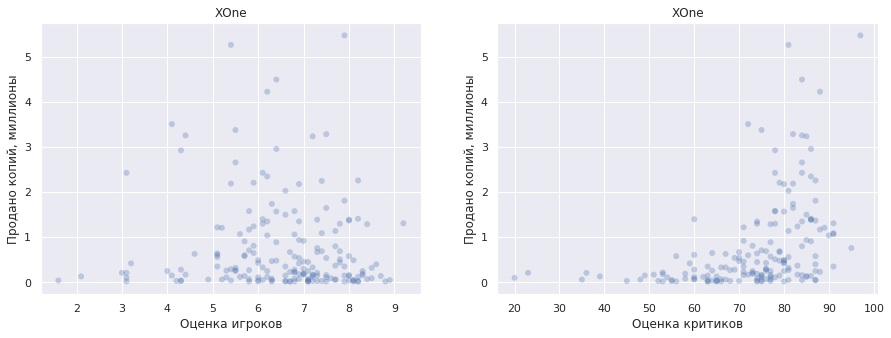

Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы XOne : -0.07 - Очень слабая, обратная
Коэффициент Пирсона для отношения отзывов критиков к продажам платформы XOne : 0.42 - Cлабая, прямая


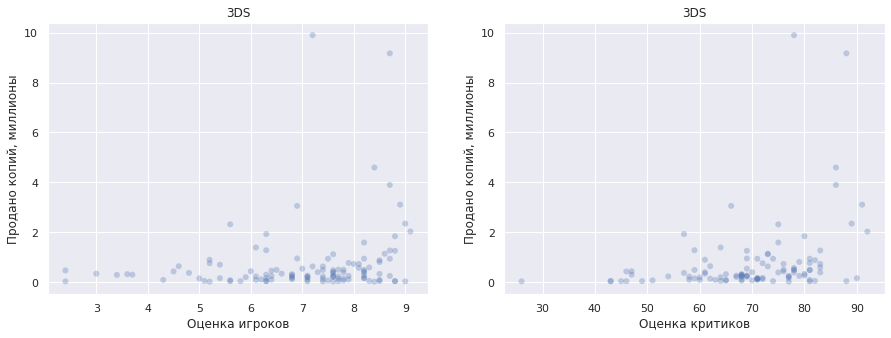

Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы 3DS : 0.20 - Очень слабая, прямая
Коэффициент Пирсона для отношения отзывов критиков к продажам платформы 3DS : 0.32 - Cлабая, прямая


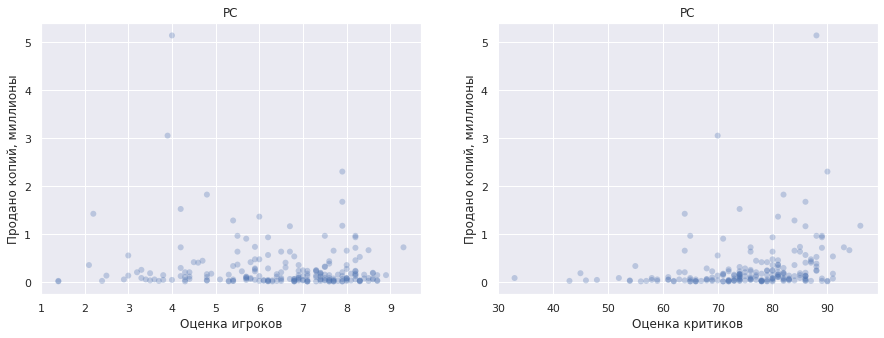

Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы PC : -0.12 - Очень слабая, обратная
Коэффициент Пирсона для отношения отзывов критиков к продажам платформы PC : 0.24 - Cлабая, прямая


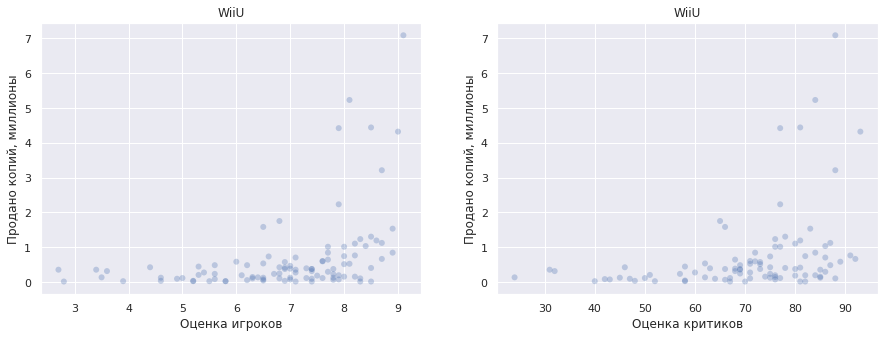

Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы WiiU : 0.40 - Cлабая, прямая
Коэффициент Пирсона для отношения отзывов критиков к продажам платформы WiiU : 0.35 - Cлабая, прямая


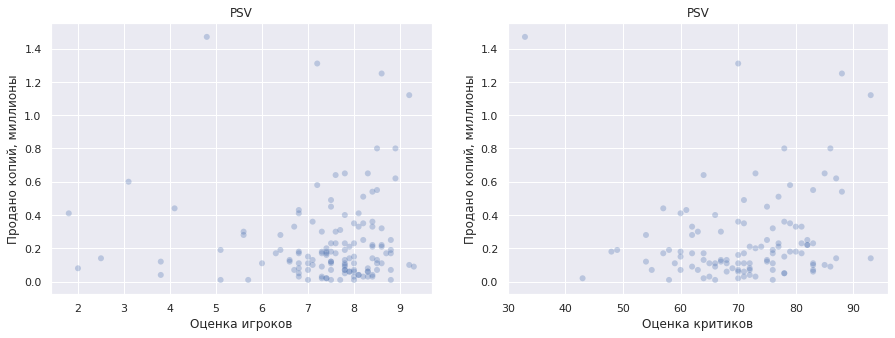

Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы PSV : -0.00 - Очень слабая, обратная
Коэффициент Пирсона для отношения отзывов критиков к продажам платформы PSV : 0.09 - Очень слабая, прямая


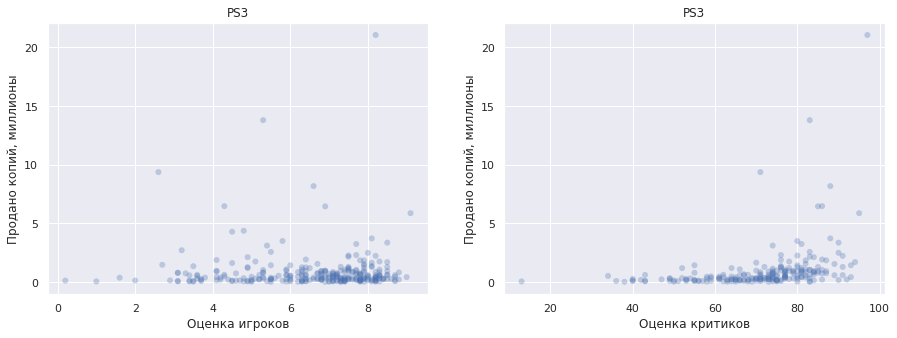

Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы PS3 : -0.01 - Очень слабая, обратная
Коэффициент Пирсона для отношения отзывов критиков к продажам платформы PS3 : 0.33 - Cлабая, прямая


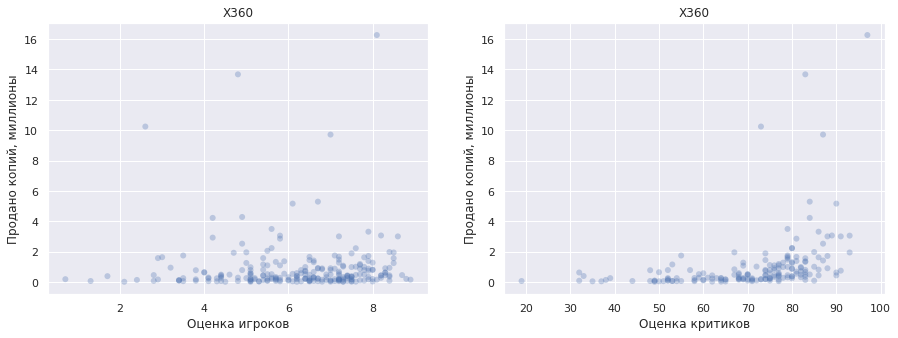

Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы X360 : 0.01 - Очень слабая, прямая
Коэффициент Пирсона для отношения отзывов критиков к продажам платформы X360 : 0.36 - Cлабая, прямая


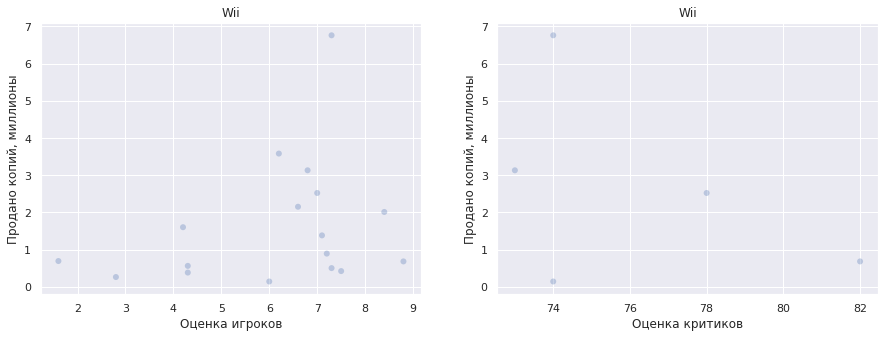

Коэффициент Пирсона для отношения отзывов пользователей к продажам платформы Wii : 0.30 - Cлабая, прямая
Коэффициент Пирсона для отношения отзывов критиков к продажам платформы Wii : -0.42 - Cлабая, обратная


In [31]:
#Построим графики и подсчитаем коэффициент корреляции для лучших 6 платформ, определенных в пункте 3.3
#Для этого используем уже созданный список с именами платформ, которые попали в актуальный период "platform_names"
for name in platform_names:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
    sns.scatterplot(data=actual_data.query('platform == @name'),
                    x="user_score",
                    y="total_sales",
                    edgecolor = 'none',
                    alpha = .3,
                    ax = ax1); 
    ax1.set_title(name, fontsize=12)
    ax1.set_xlabel("Оценка игроков", fontsize=12)
    ax1.set_ylabel("Продано копий, миллионы", fontsize=12);
    
    sns.scatterplot(data=actual_data.query('platform == @name'),
                    x="critic_score",
                    y="total_sales",
                    edgecolor = 'none',
                    alpha = .3,
                    ax = ax2);
    ax2.set_title(name, fontsize=12)
    ax2.set_xlabel("Оценка критиков", fontsize=12)
    ax2.set_ylabel("Продано копий, миллионы", fontsize=12);
    plt.show()
    
    get_correl(name)     

#### Вывод

Оценки пользователей и критиков не имеют выраженной корреляци с глобальными продажами.
Но заметно слабое влияние оценок на продажи для следующих платформ:  
  
Влияните оценок критиков на продажи:  
- XOne : 0.42 - Cлабая, прямая
- PS4 : 0.41 - Cлабая, прямая
- X360 : 0.36 - Cлабая, прямая
- WiiU : 0.35 - Cлабая, прямая
- PS3 : 0.33 - Cлабая, прямая
- 3DS : 0.32 - Cлабая, прямая
- PC : 0.24 - Cлабая, прямая

Влияните оценок пользователей на продажи:
- WiiU : 0.40 - Cлабая, прямая
- Wii : 0.30 - Cлабая, прямая

Не будем брать во внимание результат корреляции отзывов критиков к продажам платформы Wii (-0.42 - Cлабая, обратная) он не точен из-за малого количества оцененных игр.  

Рейтинг критиков имеет положительное влияние на продажи игр, особенно для платформ XOne и PS4.  
Оценки пользователей заметно влияют только на продажи семейства платформ Wii.

### Изучение жанров игр.

Посмотрим на общее распределение игр по жанрам.

In [34]:
median_sales_by_genres = actual_data.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='median'
).sort_values(by='total_sales', ascending=False)
display(median_sales_by_genres.head(5))
median_sales_by_genres.tail(5)

,total_sales
genre,
Shooter,0.44
Sports,0.24
Platform,0.21
Role-Playing,0.14
Racing,0.14


,total_sales
genre,
Misc,0.12
Simulation,0.12
Strategy,0.08
Puzzle,0.04
Adventure,0.03


Text(0, 0.5, 'Количество проданных копий, миллионы')

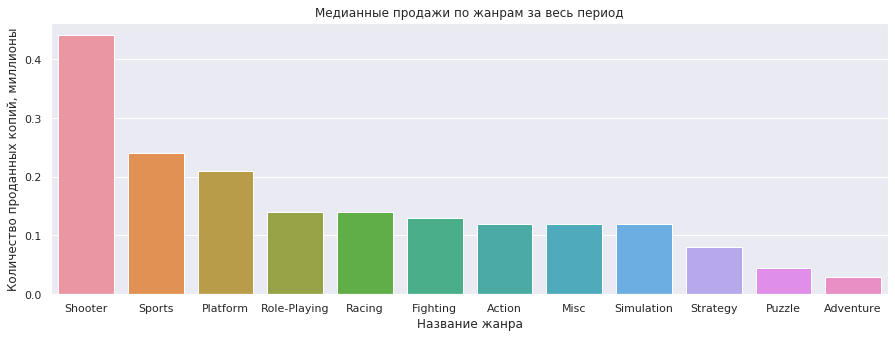

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x=median_sales_by_genres.index,y=median_sales_by_genres['total_sales'])
plt.title("Медианные продажи по жанрам за весь период")
plt.xlabel("Название жанра")
plt.ylabel("Количество проданных копий, миллионы")

Общие продажи сильно зависили от количества выпущенных игр, при сравнении жанров по медианным продажам, выводы изменились. Отредактирую последующие выводы с учетом новой информации в обычных ячейках.   
    
Видно, что 4 жарна сильно выделяются по медианным продажам:
- Shooter: 0.42 миллиона копий
- Sports: 0.24 миллиона копий
- Platform: 0.21 миллиона копий
- Role-Playing 0.13 миллиона копий

Остальне жанры значительно отстают.  
Можно выделить 2 самых непопулярных жанра:
- Puzzle: 0.04 миллиона копий
- Adventure: 0.03 миллиона копий
</div>

### Вывод

1. Период с 2012 года включительно был выбран как актуальный, исследование опиралось именно на него.  

2. Платформы **PS4** и **XOne** выделены как перспективные, они лидируют по объемам продаж, они также находятся в состоянии роста.  

3. Определены платформы, на которых чаще выходили успешные, состоявшиеся в продажах игры:  
 - PS3
 - X360
 - PS4
 - XOne
 - WiiU
 - Wii
 
 
4. Оценки пользователей и критиков **не имеют** выраженной корреляци с глобальными продажами.  
Рейтинг критиков имеет **слабое положительное** влияние на продажи игр, особенно для платформ **XOne** и **PS4**.  
Оценки пользователей **заметно** влияют только на продажи семейства платформ **Wii**.



5. Исслудование жанров
Видно, что 4 жарна сильно выделяются по медианным продажам:
- Shooter: 0.42 миллиона копий
- Sports: 0.24 миллиона копий
- Platform: 0.21 миллиона копий
- Role-Playing 0.13 миллиона копий

Остальне жанры значительно отстают.
Можно выделить 2 самых непопулярных жанра:
- Puzzle: 0.04 миллиона копий
- Adventure: 0.03 миллиона копий

## Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияние рейтинга ESRB.

In [36]:
#Посчитаем процентное отношение количества пропусков в столбце rating к общему количеству игр в актуальный период.
actual_data['rating'].isna().sum() / actual_data.shape[0]

0.4417879417879418

Количество пропусков в данной категории достаточно велико.  
Заменим пропуски на значение 'non rated', чтобы не упускать информацию о данной категории игр.

In [37]:
#Заменим пропуски на значение 'non rated'
actual_data['rating'] = actual_data['rating'].fillna('non_rated')

In [38]:
#Для того, чтобы выяснить портрет пользователя для каждого региона создадим функцию
def user_portrait(region_sales):    
    
    #Строим сводную таблицу, чтобы найти топ 5 платформ для региона
    region_platform_pivot = actual_data.pivot_table(
        index='platform',
        values=region_sales,
        aggfunc='sum'
        ).sort_values(by=region_sales, ascending=False)
    region_platform_pivot['percentage'] = region_platform_pivot[region_sales] / region_platform_pivot[region_sales].sum() * 100
    display(region_platform_pivot.head(5))
    
    #Строим сводную таблицу, чтобы найти топ 5 жанров для региона
    region_genre_pivot = actual_data.pivot_table(
        index='genre',
        values=region_sales,
        aggfunc='sum'
        ).sort_values(by=region_sales, ascending=False)
    region_genre_pivot['percentage'] = region_genre_pivot[region_sales] / region_genre_pivot[region_sales].sum() * 100
    display(region_genre_pivot.head(5))
    
    #Строим сводную таблицу, чтобы найти топ 5 типов рейтинга для региона
    region_rating_pivot = actual_data.pivot_table(
        index='rating',
        values=region_sales,
        aggfunc='sum'
        ).sort_values(by=region_sales, ascending=False)
    region_rating_pivot['percentage'] = region_rating_pivot[region_sales] / region_rating_pivot[region_sales].sum() * 100
    display(region_rating_pivot.head(5))    
    
    
    #Выводим 3 графика по сводным таблицам в одном поле
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
    
    
    sns.barplot(x = region_platform_pivot.head(5).index,
                y = region_platform_pivot.head(5)['percentage'],
                ax = ax1); 
    ax1.set_title("Отношение продаж по платформам", fontsize=14)
    ax1.set_xlabel("Название платформы", fontsize=12)
    ax1.set_ylabel("Отношение проданных копий, %", fontsize=12);
    
    
    sns.barplot(x = region_genre_pivot.head(5).index,
                y = region_genre_pivot.head(5)['percentage'],
                ax = ax2); 
    ax2.set_title("Отношение продаж по жанрам", fontsize=14)
    ax2.set_xlabel("Название платформы", fontsize=12)
    ax2.set_ylabel("Отношение проданных копий, %", fontsize=12);

    
    sns.barplot(x = region_rating_pivot.head(5).index,
                y = region_rating_pivot.head(5)['percentage'],
                ax = ax3); 
    ax3.set_title("Отношение продаж по типу рейтинга", fontsize=14)
    ax3.set_xlabel("Тип рейтинга", fontsize=12)
    ax3.set_ylabel("Отношение проданных копий, %", fontsize=12);

,na_sales,percentage
platform,,
X360,140.05,23.70
PS4,108.74,18.40
PS3,103.38,17.49
XOne,93.12,15.76
3DS,55.31,9.36


,na_sales,percentage
genre,,
Action,177.84,30.09
Shooter,144.77,24.50
Sports,81.53,13.80
Role-Playing,64.00,10.83
Misc,38.19,6.46


,na_sales,percentage
rating,,
M,231.57,39.18
E,114.37,19.35
non_rated,103.31,17.48
E10+,75.70,12.81
T,66.02,11.17


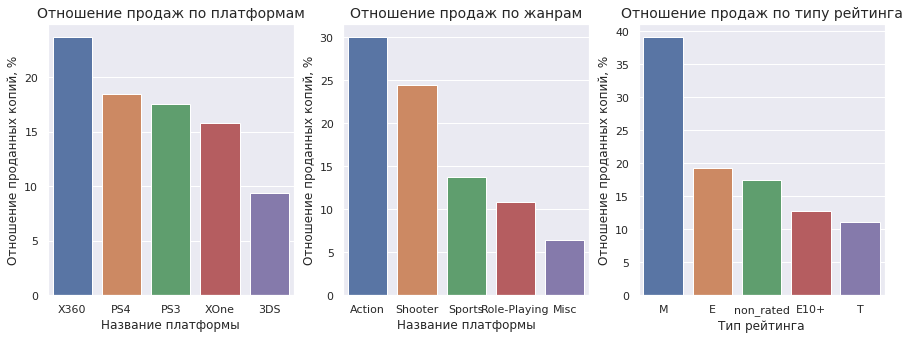

In [39]:
#Вызываем функцию для определения портрета пользователя в регионе NA
user_portrait('na_sales')

**Северная Америка**

Пользватели из региона Северная Америка в основном играют на консолях семейства **Xbox** и **PS**, следом за ним идет **3DS**. 
- X360 23.70% 
- PS4 18.40%
- PS3 17.49%
- XOne 15.76%
- 3DS 9.36%

Cреди жанров можн выделить 2 особо популярных - **Action** (30%) и **Shooter** (24.5%), остальные жарны заметно уступают:
- Action 30.09%
- Shooter 24.50%
- Sports 13.80%
- Role-Playing 10.83%
- Misc 6.46%

Рейтин сильно влияет на объем продаж. В регионе продажи игр с рейтингом **М** ((«Mature») — «Для взрослых») составили 39% продаж, когда ближайший по продажам рейтинг **E** получил только 19% продаж.
- M 39.18%
- E 19.35%
- non_rated	17.48%
- E10+ 12.81%
- T 11.17%
Игры без рейтинга (или игры, для которых данные о рейтинге  отсутствуют, составляют 17,5% от общих продаж)

,eu_sales,percentage
platform,,
PS4,141.09,27.84
PS3,106.86,21.08
X360,74.52,14.70
XOne,51.59,10.18
3DS,42.64,8.41


,eu_sales,percentage
genre,,
Action,159.34,31.44
Shooter,113.47,22.39
Sports,69.09,13.63
Role-Playing,48.53,9.58
Racing,27.29,5.38


,eu_sales,percentage
rating,,
M,193.96,38.27
E,113.03,22.30
non_rated,91.50,18.05
E10+,55.37,10.92
T,52.96,10.45


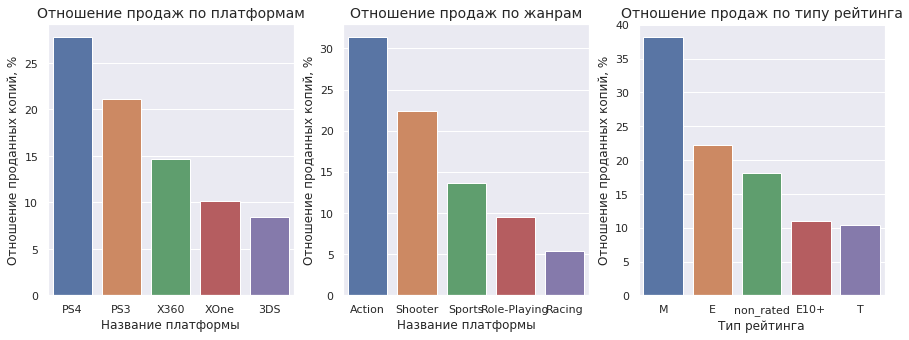

In [40]:
#Вызываем функцию для определения портрета пользователя в регионе EU
user_portrait('eu_sales')

**Европа**

Пользватели из **Европейского региона** в основном играют на консолях семейства **PS**, консоли семейства **Xbox** уступают в популярности в **2 раза**, следом за ними идет **3DS**.

- X360 27.84%
- PS4 21.08%
- PS3 14.70%
- XOne 10.18%
- 3DS 8.41%

Cреди жанров можн выделить 2 особо популярных - **Action (31.4%)** и **Shooter (22.39%)**, остальные жарны заметно уступают:	/
- Action 31.44%
- Shooter 22.39%
- Sports 13.63%
- Role-Playing 9.58%
- Misc 5.38%

Рейтин сильно влияет на объем продаж. В регионе продажи игр с рейтингом **М** ((«Mature») — «Для взрослых») составили **38%** продаж, когда ближайший по продажам рейтинг **E** получил только 22% продаж.

- M 38.27%
- E 22.30%
- non_rated 18.05%
- E10+ 10.92%
- T 10.45%

Игры без рейтинга (или игры, для которых данные о рейтинге отсутствуют, составляют 18% от общих продаж)

,jp_sales,percentage
platform,,
3DS,87.79,45.59
PS3,35.29,18.32
PSV,21.04,10.93
PS4,15.96,8.29
WiiU,13.01,6.76


,jp_sales,percentage
genre,,
Role-Playing,65.44,33.98
Action,52.80,27.42
Misc,12.86,6.68
Simulation,10.41,5.41
Fighting,9.44,4.90


,jp_sales,percentage
rating,,
non_rated,108.84,56.52
E,28.33,14.71
T,26.02,13.51
M,21.20,11.01
E10+,8.19,4.25


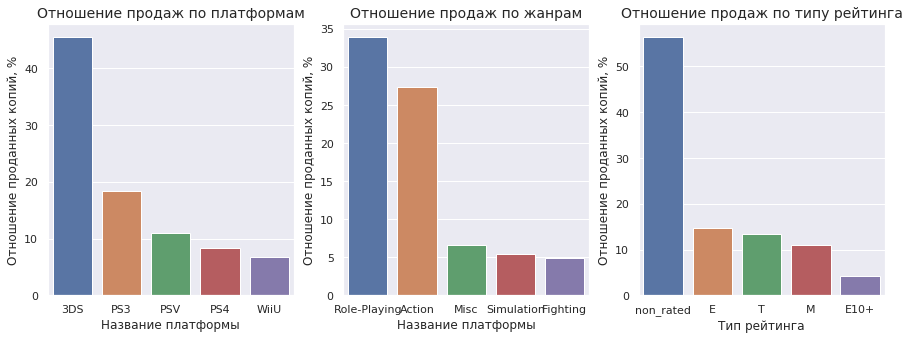

In [41]:
#Вызываем функцию для определения портрета пользователя в регионе jp
user_portrait('jp_sales')

**Япония**

Пользватели из **Японии** в основном играют на консоли **3DS**, остальные косоли сильно уступают в популярности:
- 3DS 45.59%
- PS3 18.32%
- PSV 10.93%
- PS4 8.29%
- WiiU 6.76%

Cреди жанров можн выделить 2 особо популярных - **Action (31.4%)** и **Shooter (22.39%)**, остальные жарны заметно уступают:	
- Role-Playing 33.98%
- Action 27.42%
- Misc 6.68%
- Simulation 5.41%
- Fighting 4.90%  

Рейтин не влияет на объем продаж. В регионе продажи игр без рейтинга (или с неуказанным) составили **56,5%** продаж.  
Игры, где рейтинг указан занимают меньшую часть рынка, рейтинги **E, T, M** занимают от 10% - 15%.  

- non_rated	56.52%
- E	14.71%
- T	13.51%
- M	11.01%
- E10+ 4.25%

### Вывод

Портрет пользоватеея для **Американского** и **Европейского** рынка схож и значительно отличается от портрета пользователя **Японского рынка**.  

Для создания рекламной компании для **американского рынка**, стоит обратить внимание на актуальные консоли семейства **PS** и **Xbox**, жанры **Action** и **Shooter**, с рейтингом  **М** ((«Mature») — «Для взрослых») и **E**.

Для создания рекламной компании для **европейского рынка**, стоит обратить внимание на актуальные консоли семейства **PS**, жанры **Action** и **Shooter**, с рейтингом  **М** ((«Mature») — «Для взрослых») и **E**.

Для создания рекламной компании для **японского рынка**, стоит обратить внимание на консоль **3DS**, жанры **Role-Playing** и **Action**, рейтинг для данного региона не столь важен.  

## Проверка гипотез

### Первая гипотеза

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформируем нулевую и альтернативную гипотезы:
- Нулевая гипотиза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотиза H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются;

Перед проверкой гипотизы, необходимо получить две выборки пользовательских рейтингов, без выбросов.

In [42]:
#Cоздаем выборку пользовательских рейтингов для платформы Xbox One за актуальный период
xb1_rating = actual_data.query('platform == "XOne"')['user_score']

#Cоздаем выборку пользовательских рейтингов для платформы PC за актуальный период
pc_rating = actual_data.query('platform == "PC"')['user_score']

Перед проверкой гипотезы необходимо удалить пропуски и выбросы из выборок

In [43]:
xb1_rating.isna().sum()

65

In [44]:
pc_rating.isna().sum()

44

In [45]:
xb1_rating = xb1_rating.dropna().reset_index(drop=True)
pc_rating = pc_rating.dropna().reset_index(drop=True)

In [46]:
xb1_rating.isna().sum()

0

In [47]:
pc_rating.isna().sum()

0

182

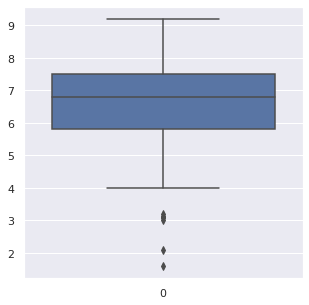

In [48]:
#Построим диаграмму размаха для выборки xb1_rating
plt.figure(figsize=(5, 5))
sns.boxplot(data=xb1_rating);
#Узнаем длинну выборки
xb1_rating.shape[0]

206

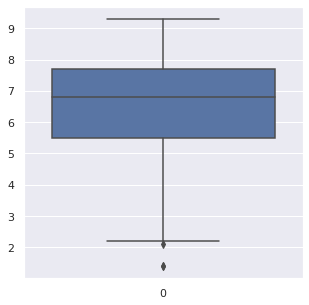

In [49]:
#Построим диаграмму размаха для выборки pc_rating
plt.figure(figsize=(5, 5))
sns.boxplot(data=pc_rating);
#Узнаем длинну выборки
pc_rating.shape[0]

In [50]:
#Напишем функцию для удаления выбросов
def delete_outliers (df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    iqr_test = (df >= (q1 - 1.5 * iqr)) & (df <= (q3 + 1.5 * iqr))
    return df.loc[iqr_test]

In [51]:
#Удалим выбросы из обоих выборок, узнаем их новую длину.
cleared_xb1_rating = delete_outliers(xb1_rating)
cleared_pc_rating = delete_outliers(pc_rating)

display(cleared_xb1_rating.shape[0])
cleared_pc_rating.shape[0]

174

203

In [52]:
#Узнаем дисперсии выборок
display(np.var(cleared_xb1_rating))
np.var(cleared_pc_rating)

1.2989179548156955

2.4512805455119024

Отлично, мы избавились от выбросов и подготовили выборки.

Воспользуемся специальным методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам - t-тестом.

Так как выборки разного размера и можно предполагать, что дисперсии у генеральных совокупностей разные, укажем параметр equal_var = False при вызове метода scipy.stats.ttest_ind().

Возьмем критический уровень статистической значимости, равный 0.05, такой точности достаточно для данного исследования.

In [53]:
#Воспользуемся t-тестом
alpha = 0.05 
results = st.ttest_ind(
    cleared_pc_rating, 
    cleared_xb1_rating,
    equal_var = False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1680281207940145
Не получилось отвергнуть нулевую гипотезу


**Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

### Вторая гипотеза

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**




Сформируем нулевую и альтернативную гипотезы:
- Нулевая гипотиза H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.;
- Альтернативная гипотиза H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.;

Перед проверкой гипотизы, необходимо получить две выборки пользовательских рейтингов, без выбросов.

In [54]:
#Cоздаем выборку пользовательских рейтингов для жанра Action за актуальный период
Action_rating = actual_data.query('genre == "Action"')['user_score']

#Cоздаем выборку пользовательских рейтингов для жанра Sports за актуальный период
Sports_rating = actual_data.query('genre == "Sports"')['user_score']

Перед проверкой гипотезы необходимо удалить пропуски и выбросы из выборок

In [55]:
Action_rating.isna().sum()

508

In [56]:
Sports_rating.isna().sum()


73

In [57]:
#Удаляем пропуски и сразу проверяем результат для обеих выборок

Action_rating = Action_rating.dropna().reset_index(drop=True)
display(Action_rating.isna().sum())

Sports_rating = Sports_rating.dropna().reset_index(drop=True)
Sports_rating.isna().sum()

0

0

523

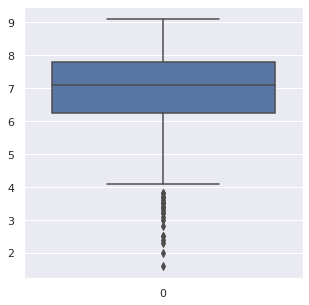

In [58]:
#Построим диаграмму размаха для выборки Action_rating
plt.figure(figsize=(5, 5))
sns.boxplot(data=Action_rating);
#Узнаем длинну выборки
Action_rating.shape[0]

195

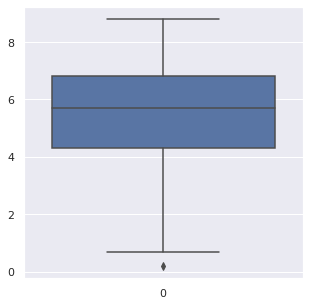

In [59]:
#Построим диаграмму размаха для выборки Action_rating
plt.figure(figsize=(5, 5))
sns.boxplot(data=Sports_rating);
#Узнаем длинну выборки
Sports_rating.shape[0]

In [60]:
#Удалим выбросы из обоих выборок, узнаем их новую длину.
Sports_rating = delete_outliers(Sports_rating)
Action_rating = delete_outliers(Action_rating)

display(Sports_rating.shape[0])
Action_rating.shape[0]

194

496

In [61]:
#Узнаем дисперсии выборок
display(np.var(Sports_rating))
np.var(Action_rating)

2.8797621957700072

1.2031542257414152

Отлично, мы избавились от выбросов и подготовили выборки.

Воспользуемся специальным методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам - t-тестом.

Так как выборки разного размера и можно предполагать, что дисперсии у генеральных совокупностей разные, укажем параметр equal_var = False при вызове метода scipy.stats.ttest_ind().

Возьмем критический уровень статистической значимости, равный 0.05, такой точности достаточно для данного исследования.

In [62]:
#Воспользуемся t-тестом
alpha = 0.05 
results = st.ttest_ind(
    Sports_rating, 
    Action_rating,
    equal_var = False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1892403824390017e-25
Отвергаем нулевую гипотезу


Отвергнуть нулевую гипотезу и принимаем альтернативную гипотезу H1: **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются**

## Общий вывод

Полученные данные были предобработаны перед исследованием.
  
1. В ходе исследования был определен актуальный период для дальнейшего анализа данных.  
Период с 2012 года включительно был выбран как актуальный. 
В 2012 году активный спад количества игр прекратился, начиная с 2012 года количество выпускаемых игр стабилизировалось.  
Таким образом, мы рассматривали данные за 5 лет.  
Срок жизни платформы лежит в прериоде от 7 - 11 лет, срок в 5 лет позволил нам оценить актуальность попавших в данный срез платформ, заметить тенденцию к росту или падению.
   
2. Платформы **PS4** и **XOne** выделены как перспективные, они лидируют по объемам продаж, они также находятся в состоянии роста.  
   
3. Определены платформы, на которых чаще выходили успешные, состоявшиеся в продажах игры:  
 - PS3
 - X360
 - PS4
 - XOne
 - WiiU
 - Wii
  
4. Оценки пользователей и критиков **не имеют** выраженной корреляци с глобальными продажами.   
Рейтинг критиков имеет **слабое положительное** влияние на продажи игр, особенно для платформ **XOne** и **PS4**.   
Оценки пользователей **заметно** влияют только на продажи семейства платформ **Wii**.
  
5. Исследование жанров
Видно, что 4 жарна сильно выделяются по медианным продажам:
- Shooter: 0.42 миллиона копий
- Sports: 0.24 миллиона копий
- Platform: 0.21 миллиона копий
- Role-Playing 0.13 миллиона копий

Остальне жанры значительно отстают.  
Можно выделить 2 самых непопулярных жанра:
- Puzzle: 0.04 миллиона копий
- Adventure: 0.03 миллиона копий
  
6. Определены портреты пользователей по регионам.  
Портрет пользоватеея для **Американского** и **Европейского** рынка схож и значительно отличается от портрета пользователя **Японского рынка**:
- Для создания рекламной компании для **американского рынка**, стоит обратить внимание на актуальные консоли семейства **PS** и **Xbox**, жанры **Action** и **Shooter**, с рейтингом  **М** ((«Mature») — «Для взрослых») и **E**.  
- Для создания рекламной компании для **европейского рынка**, стоит обратить внимание на актуальные консоли семейства **PS**, жанры **Action** и **Shooter**, с рейтингом  **М** ((«Mature») — «Для взрослых») и **E**.   
- Для создания рекламной компании для **японского рынка**, стоит обратить внимание на консоль **3DS**, жанры **Role-Playing** и **Action**, рейтинг для данного региона не столь важен.    

7. Были проверены и приняты 2 гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.
